In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('data_sales_weather.csv')
data.head()

,StockCode,Description,Quantity,Price,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon,temp_rounded,wind_rounded,revenue
0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,2009-12-01 07:45:00,2.38,0.96,-0.25,2.5,1013,85,1.5,0,20,801,Clouds,few clouds,02n,2.4,1.5,83.4
1,79323P,PINK CHERRY LIGHTS,12,6.75,2009-12-01 07:45:00,2.38,0.96,-0.25,2.5,1013,85,1.5,0,20,801,Clouds,few clouds,02n,2.4,1.5,81.0
2,79323W,WHITE CHERRY LIGHTS,12,6.75,2009-12-01 07:45:00,2.38,0.96,-0.25,2.5,1013,85,1.5,0,20,801,Clouds,few clouds,02n,2.4,1.5,81.0
3,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,2009-12-01 07:45:00,2.38,0.96,-0.25,2.5,1013,85,1.5,0,20,801,Clouds,few clouds,02n,2.4,1.5,100.8
4,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,2009-12-01 07:45:00,2.38,0.96,-0.25,2.5,1013,85,1.5,0,20,801,Clouds,few clouds,02n,2.4,1.5,30.0


In [ ]:
#Let's see if sales volume is very different per week day
#First number of orders
#Then revenue

In [5]:
data['dt_iso'] = pd.to_datetime(data['dt_iso'], format='%Y-%m-%d %H:%M:%S')

In [7]:
data.dtypes

StockCode                      object
Description                    object
Quantity                        int64
Price                         float64
dt_iso                 datetime64[ns]
temp                          float64
feels_like                    float64
temp_min                      float64
temp_max                      float64
pressure                        int64
humidity                        int64
wind_speed                    float64
wind_deg                        int64
clouds_all                      int64
weather_id                      int64
weather_main                   object
weather_description            object
weather_icon                   object
temp_rounded                  float64
wind_rounded                  float64
revenue                       float64
dtype: object

In [18]:
data['day_of_week'] = data['dt_iso'].dt.day_name()
data['day_of_month'] = data['dt_iso'].dt.day
data['month'] = data['dt_iso'].dt.month_name()
data['year'] = data['dt_iso'].dt.year

In [19]:
data.head()

,StockCode,Description,Quantity,Price,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon,temp_rounded,wind_rounded,revenue,day-of-week,month,day_of_week,day_of_month,year
0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,2009-12-01 07:45:00,2.38,0.96,-0.25,2.5,1013,85,1.5,0,20,801,Clouds,few clouds,02n,2.4,1.5,83.4,Tuesday,December,Tuesday,1,2009
1,79323P,PINK CHERRY LIGHTS,12,6.75,2009-12-01 07:45:00,2.38,0.96,-0.25,2.5,1013,85,1.5,0,20,801,Clouds,few clouds,02n,2.4,1.5,81.0,Tuesday,December,Tuesday,1,2009
2,79323W,WHITE CHERRY LIGHTS,12,6.75,2009-12-01 07:45:00,2.38,0.96,-0.25,2.5,1013,85,1.5,0,20,801,Clouds,few clouds,02n,2.4,1.5,81.0,Tuesday,December,Tuesday,1,2009
3,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,2009-12-01 07:45:00,2.38,0.96,-0.25,2.5,1013,85,1.5,0,20,801,Clouds,few clouds,02n,2.4,1.5,100.8,Tuesday,December,Tuesday,1,2009
4,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,2009-12-01 07:45:00,2.38,0.96,-0.25,2.5,1013,85,1.5,0,20,801,Clouds,few clouds,02n,2.4,1.5,30.0,Tuesday,December,Tuesday,1,2009


In [13]:
size_day_week = data.groupby(['day-of-week']).size()
size_day_week

day-of-week
Friday       134910
Monday       169094
Saturday        370
Sunday       126556
Thursday     178387
Tuesday      176586
Wednesday    162418
dtype: int64

In [14]:
revenue_day_week = data.groupby(['day-of-week']).agg({'revenue':sum}).reset_index()
revenue_day_week

,day-of-week,revenue
0,Friday,2404208.373
1,Monday,2818016.895
2,Saturday,9042.360
3,Sunday,1577243.842
4,Thursday,3220412.092
5,Tuesday,3217988.862
6,Wednesday,2739147.913


In [20]:
size_day_month = data.groupby(['day_of_month']).size()
size_day_month

day_of_month
1     30963
2     28230
3     26915
4     34346
5     32610
6     33110
7     40170
8     39785
9     29926
10    33719
11    33577
12    26356
13    29934
14    34029
15    30516
16    30942
17    35539
18    34974
19    28498
20    28541
21    33308
22    31912
23    29274
24    29738
25    31185
26    24948
27    25441
28    31411
29    27463
30    24376
31    16585
dtype: int64

In [21]:
revenue_day_month = data.groupby(['day_of_month']).agg({'revenue':sum}).reset_index()
revenue_day_month

,day_of_month,revenue
0,1,521290.121
1,2,485457.250
2,3,509345.891
3,4,617096.560
4,5,514646.780
5,6,504096.520
6,7,711957.340
7,8,731431.471
8,9,520199.280
9,10,560143.430


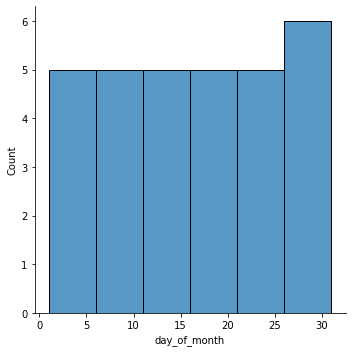

In [24]:
sns.displot(revenue_day_month['day_of_month'])
plt.show()

In [27]:
data.to_csv('data_sales_weather_split.csv')